import libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Reading the dataset.
1. Made the index column as index and dropped it as column
2. Removed the gender column as it's binary data, so will bias the model to cluster along it's own dimenstion.

In [48]:
cust=pd.read_csv("../input/Mall_Customers.csv")
cust.columns=["id","gender","age","income","score"]
cust.index=cust.id.values
cust=cust.drop(["id","gender"],axis=1)
cust.head()

,age,income,score
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


Statistical overview of the data

In [49]:
cust.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Plotting the data to see if we can manually decide the number of cluster centers

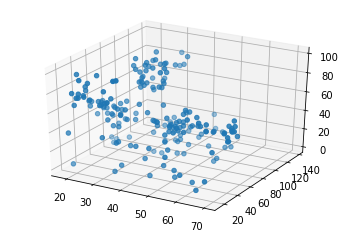

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(cust.age,cust.income,cust.score)

It's almost clear from the data that there are 3 clusters:
1. with low age and high income
2. with low age and low income
3. with high age and low income

Using sklearn standard kmeans method to verify our hypothesis

In [51]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3).fit_predict(cust.values)

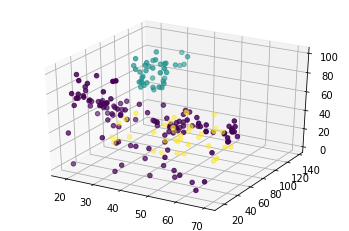

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(cust.age,cust.income,cust.score,c=kmean)

More or less the clusters are formed as similar to our hypothesis. Although there is some discrepancies between customers with low income-low age and low income-high age.